In [1]:
#importing libraries and data

import pandas as pd
import numpy as np

# Load data
freyja_data = pd.read_csv("D:\prisha_manipal_sp\manas\Freyja_Pumpkins.csv")
gotem_data = pd.read_csv("D:\prisha_manipal_sp\manas\Gotem Pumpkins.csv")

In [2]:
# convert classes to numerical labels (0 and 1)
gotem_data['Class'] = gotem_data['Class'].map({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})
freyja_data['Class'] = freyja_data['Class'].map({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})

In [3]:
X_train = gotem_data.drop(columns=['Class']).values
y_train = gotem_data['Class'].values

X_test = freyja_data.drop(columns=['Class']).values
y_test = freyja_data['Class'].values

In [4]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# initializing weights and bias
theta = np.zeros(X_train.shape[1])
b = 0

In [18]:
def computeCost(X, y, theta, b):
    m = len(y)
    z = np.dot(X, theta) + b
    predictions = sigmoid(z)
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [26]:
def gradientDescent(X, y, theta, b, learning_rate, iterations):
    m = len(y)
    costHistory = []

    for i in range(iterations):
        # Compute predictions
        z = np.dot(X, theta) + b
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)

        # Update parameters
        theta -= learning_rate * dw
        b -= learning_rate * db

        # Save cost
        cost = computeCost(X, y, theta, b)
        costHistory.append(cost)

    return theta, b, costHistory

In [27]:
learning_rate = 0.001
iterations = 1000

theta, b, costHistory = gradientDescent(X_train, y_train, theta, b, learning_rate, iterations)

In [28]:
def predict(X, theta, b):
    z = np.dot(X, theta) + b
    probabilities = sigmoid(z)
    return [1 if p >= 0.5 else 0 for p in probabilities]

y_pred = predict(X_test, theta, b)

In [29]:
accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 86.8 %


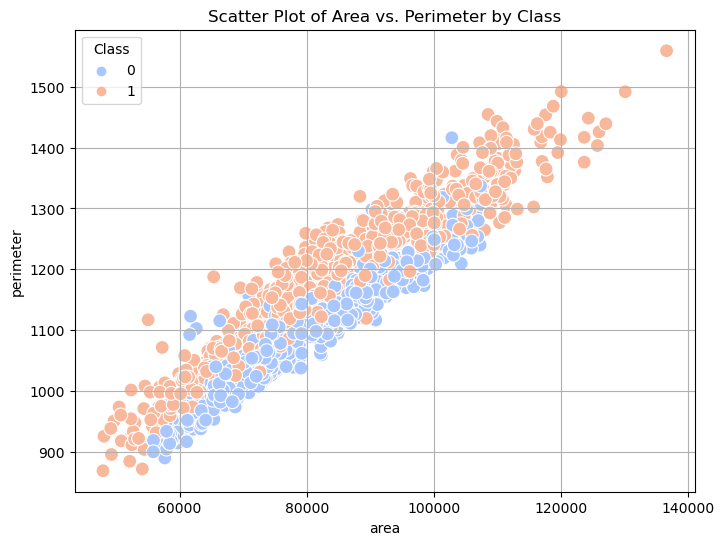

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Area vs. Perimeter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gotem_data, x='Area', y='Perimeter', hue='Class', palette='coolwarm', s=100)
plt.title("Scatter Plot of Area vs. Perimeter by Class")
plt.xlabel("area")
plt.ylabel("perimeter")
plt.grid(True)
plt.show()